In [3]:
from utils.Model import Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist



%load_ext autoreload
%autoreload 2
%matplotlib inline

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [ ]:
# Load the raw Fashion-MNIST data.
train, test = fashion_mnist.load_data()

X_train_raw, y_train = train
X_test_raw, y_test = test

X_train = X_train_raw.reshape((X_train_raw.shape[0], X_train_raw.shape[1]**2))
X_test = X_test_raw.reshape((X_test_raw.shape[0], X_test_raw.shape[1]**2))

# Data organizations:
# Train data: 49000 samples from original train set: 1~49,000
# Validation data: 1000 samples from original train set: 49,000~50,000
# Test data: 10000 samples from original test set: 1~10,000
# Development data (for gradient check): 100 from the train set: 1~49,000
num_training = 49000
num_validation = 1000
num_dev = 100

X_val = X_train[-num_validation:, :]
y_val = y_train[-num_validation:]

mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

X_train = X_train[:num_training, :]
y_train = y_train[:num_training]

# Preprocessing: subtract the mean value across every dimension for training data
mean_image = np.mean(X_train, axis=0)

X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image
X_test = X_test.astype(np.float32) - mean_image
X_dev = X_dev.astype(np.float32) - mean_image

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('Development data shape:', X_dev.shape)
print('Development data shape', y_dev.shape)

In [12]:
input_size = 10
num_class = 5

model = Sequential(Input_size=input_size)
model.add('Dense', 50)
# model.add('Dense', 50)
model.add('Dense', num_class)
# model.add('Dense', o)
print(model.layers["Dense_3"].params["weight"].shape)
print(model.name_layers)

(50, 5)
['Dense_1', 'Dense_2', 'Dense_3']


In [13]:
N = 2000

batch = 64

noise = np.random.rand(N, input_size)-0.5
y = np.random.randint(0,num_class,size=N)
X = np.empty_like(noise)


for i in range(N):
    X[i] = (y[i]+noise[i])/10

print(X)

# result = model.loss(X,y)
# print(result.shape)
# print(model.layers["Dense_1"].grads)

[[ 0.24897399  0.22267062  0.17627954 ...  0.21819807  0.24843471
   0.22736829]
 [ 0.00460761 -0.0220815   0.04524966 ...  0.01628146 -0.00322513
   0.01423271]
 [ 0.39011314  0.44864669  0.43609031 ...  0.4141624   0.38281935
   0.36891808]
 ...
 [ 0.09638402  0.08675267  0.1405777  ...  0.1082018   0.07582889
   0.10766562]
 [ 0.27278439  0.34742916  0.3158034  ...  0.25965241  0.3394961
   0.33818924]
 [ 0.03840051 -0.00417912 -0.0368386  ... -0.04461091 -0.03933056
   0.0041208 ]]


In [14]:
from utils.Optimizers import SGDOptim, my_SGD

N_val = 0.1


X_train = X[:int(N*(1-N_val))]
y_train = y[:int(N*(1-N_val))]


X_val = X[int(N*(1-N_val)):]
y_val = y[int(N*(1-N_val)):]


optimizer = my_SGD()
lr = 1e-4
epoch = 20

loss_hist, train_acc_hist, valid_acc_hist = optimizer.train(model, X_train, y_train, X_val, y_val, 
        epoch, batch, lr, learning_decay=1)



number of batches for training: 28
epoch 1: loss = 36836.06869861091, train acc = 0.3927777777777778, val acc = 0.405, lr = 0.0001
epoch 2: loss = 23995.039561576854, train acc = 0.3927777777777778, val acc = 0.405, lr = 0.0001
epoch 3: loss = 15359.623834708504, train acc = 0.3927777777777778, val acc = 0.405, lr = 0.0001
epoch 4: loss = 6991.752612215315, train acc = 0.38666666666666666, val acc = 0.4, lr = 0.0001
epoch 5: loss = 2043.7460758286288, train acc = 0.3461111111111111, val acc = 0.39, lr = 0.0001
epoch 6: loss = 619.2465032698431, train acc = 0.1988888888888889, val acc = 0.225, lr = 0.0001
epoch 7: loss = 612.8325197686867, train acc = 0.1988888888888889, val acc = 0.225, lr = 0.0001
epoch 8: loss = 613.7441008032453, train acc = 0.1988888888888889, val acc = 0.225, lr = 0.0001
epoch 9: loss = 614.6753402188451, train acc = 0.1988888888888889, val acc = 0.225, lr = 0.0001
epoch 10: loss = 615.6326024541223, train acc = 0.1988888888888889, val acc = 0.225, lr = 0.0001
epo

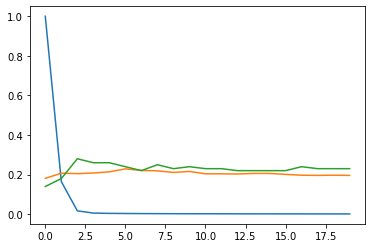

In [5]:
# print(loss_hist, train_acc_hist, valid_acc_hist)

plt.plot(loss_hist/np.max(loss_hist))
plt.plot(train_acc_hist)
plt.plot(valid_acc_hist);



In [7]:
a = []
b = []
a.append([2.3])
a.append([])
b.append([1,5])
b.append([])
for k in range(len(a)):
    print('k:',k)
    for j in range(len(a[k])):
        print('j:',j)
        print('result:',a[k][j]-b[k][j])

k: 0
j: 0
result: 1.2999999999999998
k: 1


In [12]:
a = dict()
b = dict()

a['dense_1_w'] = 5
b['dense_1_w'] = 5


for k in a:
    print('name:', k)
    print('result:', a[k]-b[k])


name: dense_1_w
result: 0
